### understaing the clip transformer

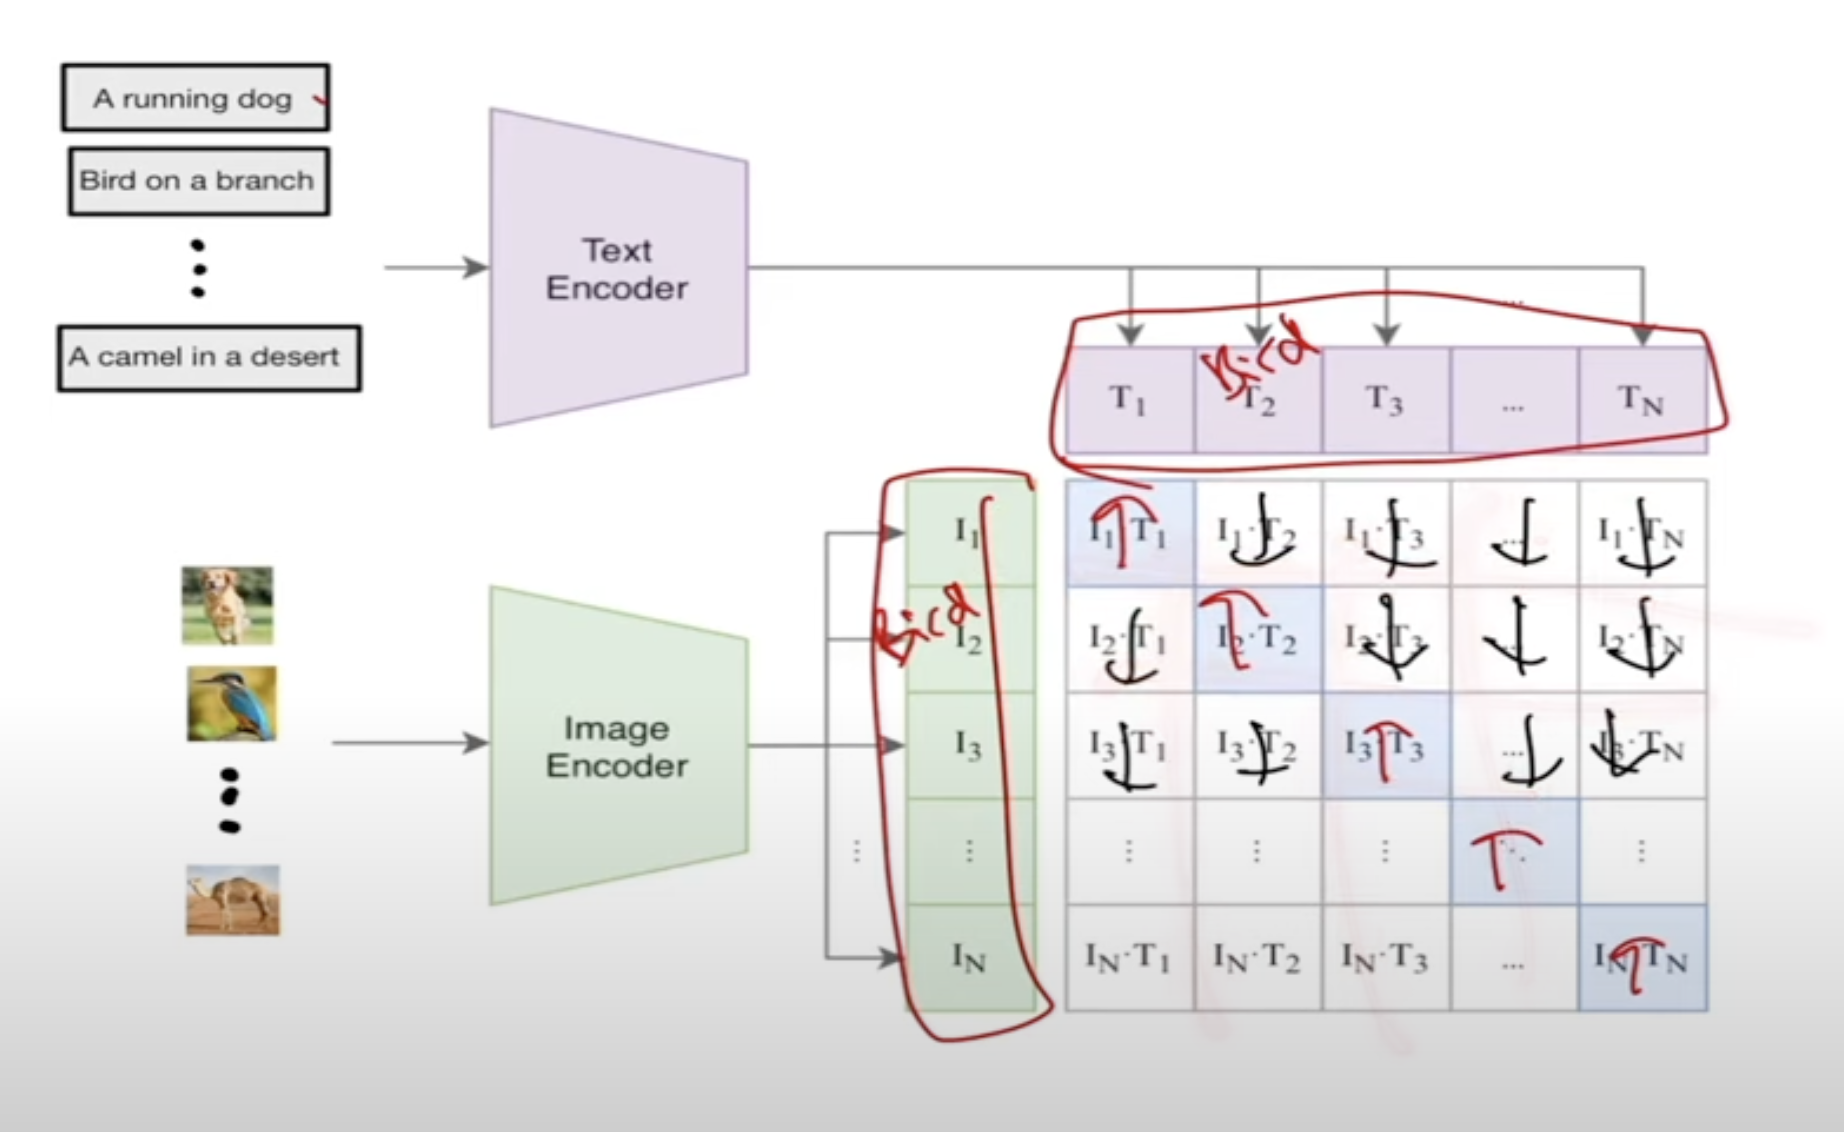

## Explanation

-> consider a scenario where we have 'n' text sentance as in above image, and we have 'n' image of the corrosponding text
-> we pass the text data to a text endcoder to generate the text embedding and we pass the image to image encoder to generate the image embedding as shown in the picture
-> the text embedding corrosponding to the Nth sample is TN and the image embedding corrosponsing to the Nth image is In
-> we take the dot product of each corrosponding text embedding with each image embedding as shown in the picture above
-> As the elenment corrosposning to the diagonal elenment are true value, we try to maximize the dot product of the corrosponsing dot product also off diagonal elenments are False values, so we try to minimize this vlaues
-> along each diagonal and each collumn we apply softmax function which takes into account the enitre row or column, which can be computationly expenssive

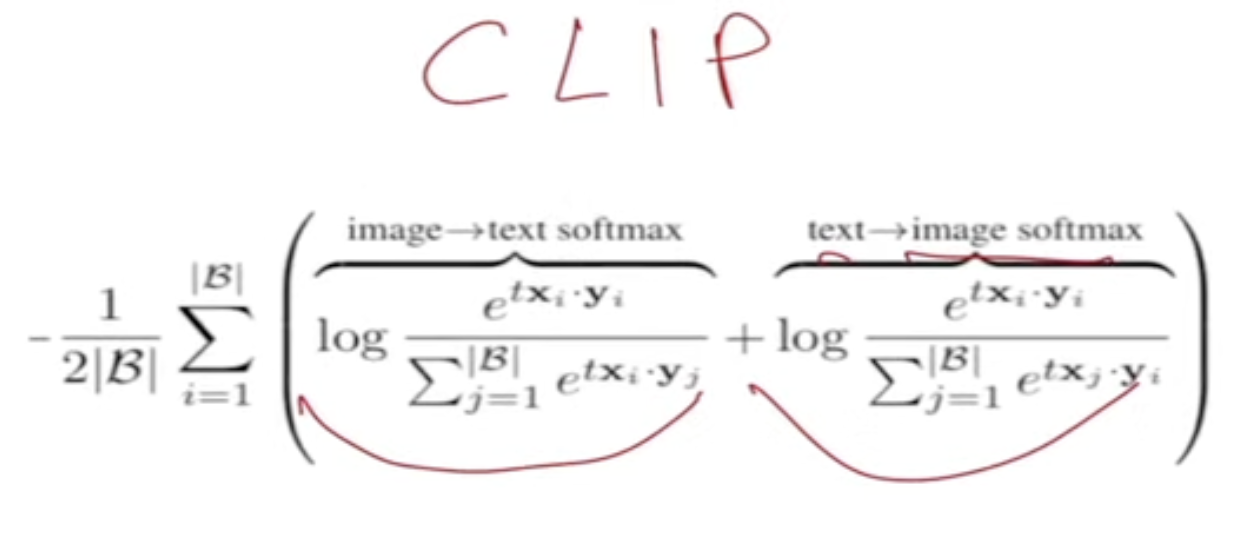

-> for clip vision transformer,consider a situation if we are computing for the first image, in that case or gole is to maximize the dot product corrosponsign to its diagonal and minimize the other dot product, this is computationally expnsive

-> another important thing is that the elenment at 1,2 and elenment at 2,1 are not symetrix, so we need to perform computation twice

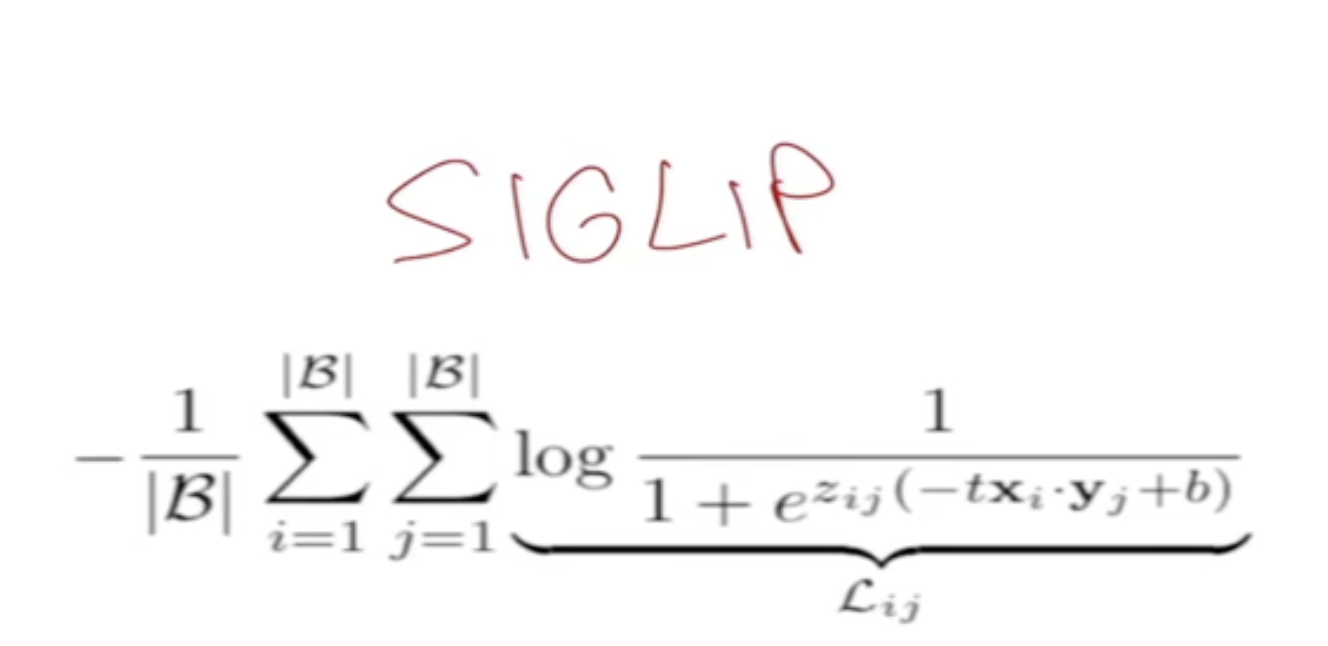

-> below is a small demo on how the computation is done using siglip, we perform the given computation in parallel in different divice

ai generated: 
The image you provided appears to be a visualization of the loss computation in a distributed training setup, particularly in the SigLIP (Signature Linear Image-Pretraining) architecture.

Key Observations in the Image:
	1.	Matrix Structure:
	•	The rows correspond to different training samples (T₁, T₂, …, T₁₂).
	•	The columns correspond to different image embeddings (I₁, I₂, …, I₁₂) derived from different devices.
	2.	Device-based Partitioning:
	•	Training samples and image embeddings are split across Device 1, Device 2, and Device 3.
	•	Each device is responsible for computing embeddings for its assigned images.
	3.	Masked Sections:
	•	The regions with yellow background and - symbols indicate masked or ignored comparisons.
	•	These regions show that embeddings from the same device are not used for similarity comparisons within that device.
	4.	Loss Computation:
	•	The final loss is computed by summing the losses across all devices.
	•	Each device computes a local loss using the embeddings from other devices.
	•	The cross-device sum (Σ) aggregates the individual device losses to ensure global consistency.




-> masked region explanation: ai generated: 
Explanation of Masked Sections in SigLIP Architecture

In the provided image, the masked sections (highlighted in yellow with - symbols) represent ignored or masked comparisons during contrastive learning.

1. Why Are These Sections Masked?
	•	The embeddings (I₁, I₂, …, I₁₂) are distributed across multiple devices.
	•	Each device processes a subset of images, meaning embeddings generated on the same device could share similar characteristics due to batch normalization, hardware effects, or training artifacts.
	•	To avoid bias and overfitting, comparisons within the same device are ignored, and loss is computed only using embeddings across different devices.

2. What Do the Masked Sections Represent?
	•	The yellow blocks correspond to self-device comparisons, which are not used in the loss function.
	•	For example:
	•	Device 1 (T₉ - T₁₂) has embeddings I₁ - I₄ but does not compare them with each other.
	•	Device 2 (T₁ - T₄) has embeddings I₅ - I₈ but does not compare them with each other.
	•	Device 3 (T₅ - T₈) has embeddings I₉ - I₁₂ but does not compare them with each other.

Thus, the masked regions ensure that similarity calculations only occur between embeddings generated on different devices.

3. What is the Benefit of Masking These Comparisons?
	•	Prevents device-specific overfitting: If embeddings are compared within the same device, training might learn device-dependent artifacts instead of meaningful representations.
	•	Encourages cross-device generalization: By computing loss across devices, the model learns more robust representations that generalize across different hardware and data distributions.
	•	Balances batch normalization effects: Batch statistics on a single device can lead to biased feature representations. Cross-device loss helps mitigate this issue.

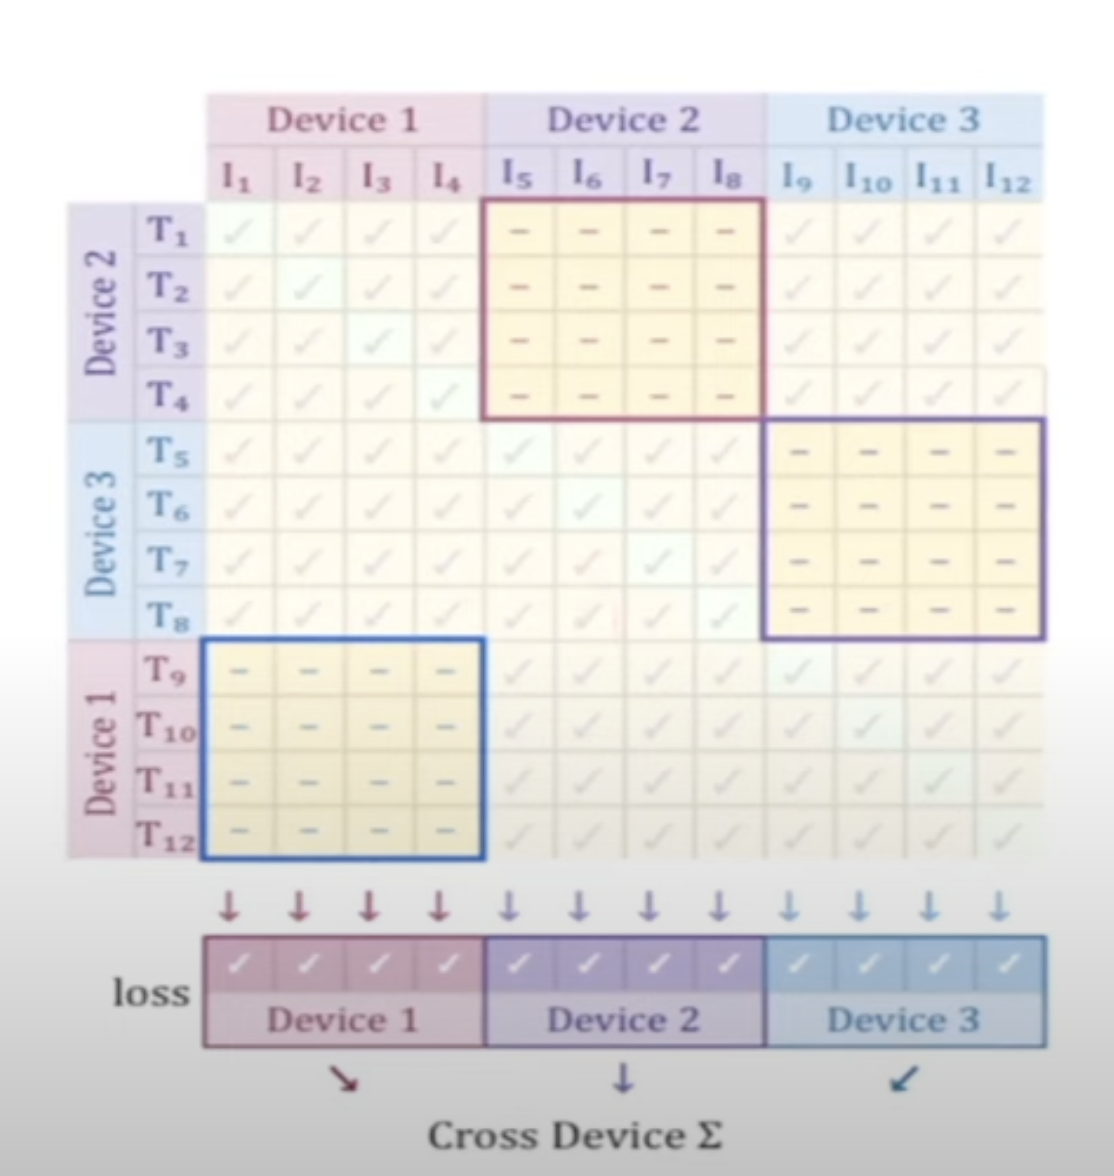

## siglip artitiecture

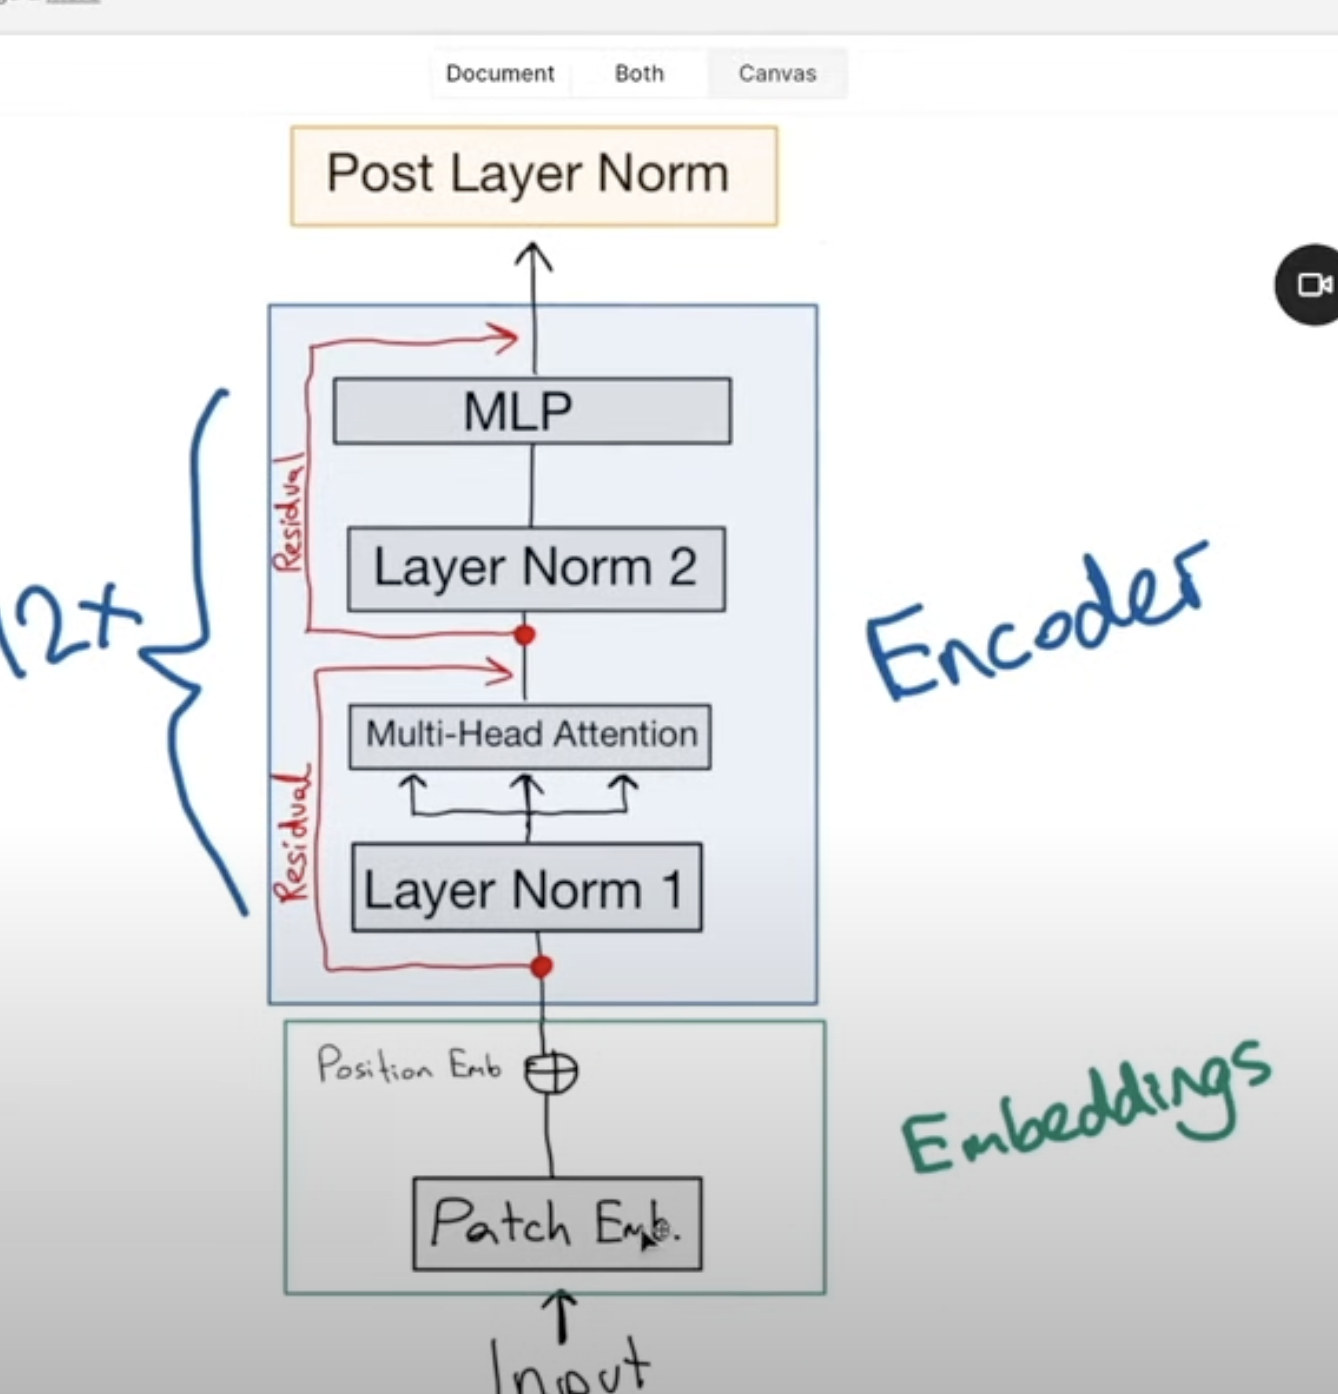